# 사이킷런을 이용하여 붓꽃(iris) 데이터 품종 예측하기

## 불꽃 데이터 세트
- 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처(Feature)를 기반으로 꽃의 품종을 예측하기 위한 것

## 지도학습

- 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다.
- 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식

In [49]:
# 사이킷런 import
from sklearn.datasets import load_iris # 붓꽃 데이터
from sklearn.tree import DecisionTreeClassifier # tree내의 모듈을 트리 기반 ML 알고리즘을 구현한 클래스 모임
from sklearn.model_selection import train_test_split # 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임

In [50]:
# 붓꽃 데이터 세트를 로딩한다.
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [51]:
# 데이터 DataFrame으로 변경
import pandas as pd

# 붓꽃 데이터 세트를 로딩한다.
iris = load_iris()

# iris.data는 iris 데이터 세트에 피처(Feature)만으로 된 데이터를 numpy로 가지고 있다.
iris_data = iris.data

# iris.data는 iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있다.
iris_label = iris.target
print('iris target 값 : ', iris_label)
print('iris target 명 : ', iris.target_names)


iris target 값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 :  ['setosa' 'versicolor' 'virginica']


In [12]:
iris_data = iris.data
iris_label = iris.target
print(iris.feature_names,'\n')
print(iris.target_names,'\n')
print(iris_data,'\n')
print(iris_label)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

['setosa' 'versicolor' 'virginica'] 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5

In [13]:
# 데이터 DataFrame으로 변경
import pandas as pd

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
idf = pd.DataFrame(iris_data,columns=iris.feature_names)
idf['label'] = iris.target
idf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 훈련 데이터, 테스트 데이터 분리

In [14]:
# 과제(0913-7)
# idf에 대해서 학습용, 평가용 데이터를 8:2로 나누어서 분류 모델링 dt 및 평가를 수행하세요.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                   test_size = 0.2, random_state=11)

In [16]:
# DecisionTreeClassifier 객체 생성
# 사이킷런 의사 결정 트리 클래스

df_clf = DecisionTreeClassifier(random_state=11) # 학습 수행

df_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

## 예측 수행
- predict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환하게 된다.

In [17]:
# 학습 완료된 .DecisionTreeCLassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = df_clf.predict(x_test)

In [18]:
# 정확도 측정
from sklearn.metrics import accuracy_score

print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9333


1. 데이터 세트 분리 : 데이터를 학습 데이터와 테스트 데이터로 분리
2. 모델 학습 : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킨다.
3. 예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측한다.
4. 평가 : 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가한다.

# 사이킷런의 기반 프레임워크 익히기

In [19]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))


<class 'sklearn.utils._bunch.Bunch'>


In [20]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)


붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [21]:
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:',type(iris_data.target_names))
print(' feature_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type:',type(iris_data.data))
print(' data 의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:',type(iris_data.target))
print(' target 의 shape:',iris_data.target.shape)
print(iris_data.target)



 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

# Model Selection 모듈 소개

**학습/테스트 데이터 셋 분리 – train_test_split()**

In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


정확도가 100% 예측한 이유는 이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문이다.

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=121)

In [24]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


과제 0916-1 : p100 - 115 예제 풀어보기

과제 0916-2 :
- tdf1 데이터셋을 RandomForest 알고리즘을 사용하여 모델링하고 사용자 함수를 작성하여 평가하세요. (분류 평가 방법 전부 적용)
- 상기 모델에 대하여 교차검증(cv=5)을 수행하고 평균 정확도를 출력하세요.
- 상기 모델에 대하여 교차검증 및 성능 개선을 수행하세요.(GridSearchCV 활용)
    - 하이퍼파라미터 :  
        params = {'n_estimators':[50,100,200],  
         'max_depth':[2, 4, 6, 8, 10],  
         'min_samples_leaf':[2,8,14,20],  
         'min_samples_split':[2,8.14,20]}  

In [72]:
# 라이브러리 임포트
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
tdf = pd.read_pickle('tdf1.pkl')
tdf.head()

,Survived,Sex,Town_0,Town_1,Town_2,Family_Big,Family_Single,Family_Small,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_Elderly,Fare_cat
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,4
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,4
4,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2


In [87]:
# 데이터셋을 이용해 트리 5개로 구성된 RandomForest 모델을 생성합니다.

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [84]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


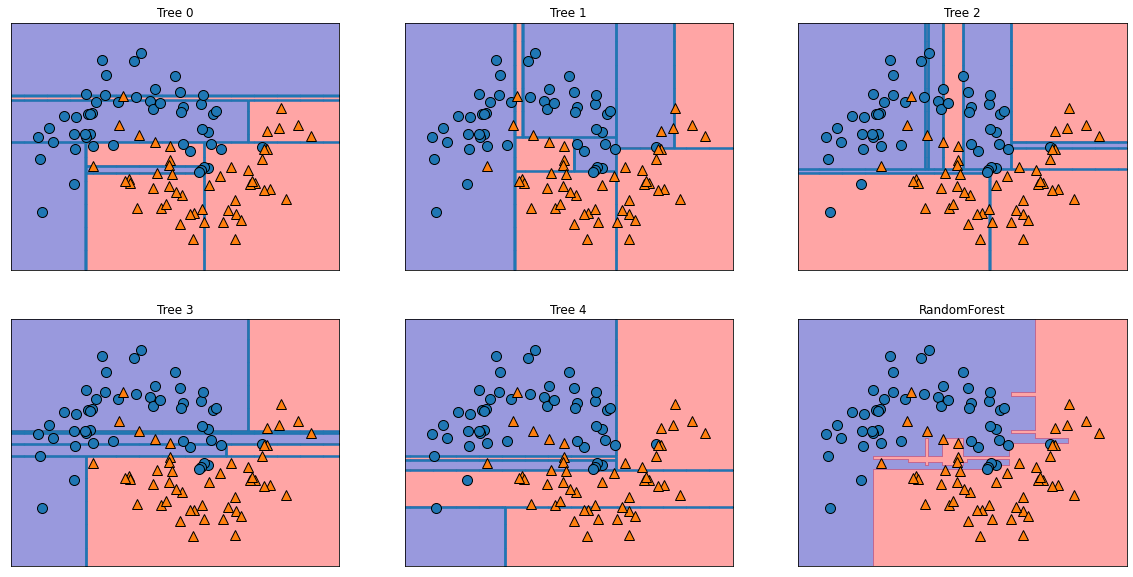

In [85]:
import mglearn
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("RandomForest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [86]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(, test_size=0.2, random_state=156)

# DecisionTree 분류기와 RandomForest 분류기 객체 생성
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# 개별 모델 학습/예측/평가
estimators = [dt_clf, rf_clf]

for estimator in estimators:
    estimator.fit(X_train, y_train)
    pred = estimator.predict(X_test)
    class_name = estimator.__class__.__name__
    print('{} 분류기 정확도: {}'.format(class_name, accuracy_score(y_test, pred)))

NameError: name 'cancer' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[50,100,200],
'max_depth':[2, 4, 6, 8, 10],
'min_samples_leaf':[2,8,14,20],
'min_samples_split':[2,8.14,20]}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# n_jobs = -1 을 지정하면 모든 CPU 코어를 이용해 학습 가능
rf_clf = RandomForestClassifier(n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적의 하이퍼 파라미터 :',grid_cv.best_params_)
print('최적의 예측 정확도 :',grid_cv.best_score_)

**교차 검증**
- 본고사를 치르기 전에 모의고사를 여러 번 보는 것
- 대부분의 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스다.
- ML에 사용되는 데이터 세트를 세분화해서 학습, 검증, 테스트 데이터 세트로 나눌 수 있다.

**K 폴드**
- 가장 보편적으로 사용되는 교차 검증 기법
- K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법
- 5개의 폴드 세트로 분리

In [53]:
# K 폴드 교차 검증
# K = 5

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기 : ', features.shape[0])

붓꽃 데이터 세트 크기 :  150


- 전체 데이터 세트는 150개
- 학습용 데이터 세트는 4/5인 120개
- 검증 테스트 데이터 세트는 1/5인 30개로 분할된다.

In [27]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


- 교차 시마다 검증 세트의 인덱스가 달라짐

**Stratified K 폴드**
- 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
- 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말한다.
- K폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 데이터 세트에 제대로 분배하지 못하는 경우의 문제를 해결해 준다.

In [54]:
# Startified K 폴드

import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [55]:
# 학습, 검증 레이블 데이터 값의 분포도 확인
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


**StratifiedKFold 활용**

In [56]:
# StratifiedKFold 활용

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n', label_test.value_counts())
    print()

## 교차 검증 : 1
학습 레이블 데이터 분포 : 
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    17
1    17
2    16
Name: label, dtype: int64

## 교차 검증 : 2
학습 레이블 데이터 분포 : 
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    17
2    17
1    16
Name: label, dtype: int64

## 교차 검증 : 3
학습 레이블 데이터 분포 : 
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 1    17
2    17
0    16
Name: label, dtype: int64



**StratifiedKFold 이용해 데이터 분리**

In [57]:
#  StratifiedKFold 이용해 데이터 분리

dt_clf = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split() 으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(x_train, y_train)
    pred = dt_clf.predict(x_test)
    
    # 반복 시마다 정확도 예측
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred),4)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도 : ', np.round(cv_accuracy,4))
print('## 평균 검증 정확도 : ', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 :  [0.98 0.94 0.98]
## 평균 검증 정확도 :  0.9666666666666667


- 회귀(Regression)에서는 Stratified K 폴드가 지원되지 않는다.
    - 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없기 때문이다.

**교차 검증 간편하게 - cross_val_score()**

- 다음 과정을 한꺼번에 해주는 API
    - 폴드 세트를 설정
    - for 루프에서 반복적으로 학습 및 테스트 데이터의 인덱스를 추출
    - 반복적으로 학습과 예측을 수행하고 예측 성능을 반환
- cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs = 1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs'). estimator, X, y, scoring, cv가 주요 파라미터
    - X = 피처 데이터 세트
    - y = 레이블 데이터 세트
    - scoring = 예측 성능 평가 지표를 기술
    - cv = 교차 검증 폴드 수를 의미

In [58]:
# cross_val_score() 할용

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도 : ',np.round(scores, 4))
print('평균 검증 정확도  : ', np.round(np.mean(scores), 4))

교차 검증별 정확도 :  [0.98 0.94 0.98]
평균 검증 정확도  :  0.9667


cross_val_score()는 단 하나의 평가 지표만 가능하지만, cross_validate()는 여러 개의 평가 지표를 반환할 수 있다.

**GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에**

- 사이킷런은 GridSearchCV API를 이용해 Classifier나 Regression와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 최적의 파라미터를 도출할 수 있는 방안을 제공한다.

**GridSearchCV 클래스 생성자 주요 파라미터**

- estimator : classifier, regressor, pipeline이 사용 가능
- param_grid : key + 리스트 값을 가지는 딕셔너리가 주어진다. ertimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정
- scoring : 예측 성능을 측정할 평가 방법을 지정
- cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정
- refit : 디폴트는 True, True 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킨다.

In [59]:
# GridSearchCV 이용

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size = 0.2, random_state=121)

dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정

parameters = {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]}


In [60]:
import pandas as pd

# param_Grid의 하이퍼 라마티러를 3개의 train, test set fold로 나누어 테스트 수행 설정
# result=True가 defual - True면 가장 좋은 파라미터 설정으로 재학습 시킨다.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

#붓꽃 학습 데이터로 param_grid 하이퍼 파라미터 순차적 학습/평가
grid_dtree.fit(x_train, y_train)

# 결과 추출 후 dataframe으로 변경

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
          'split0_test_score', 'split1_test_score', 'split2_test_score']]


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


**최적 파라미터, 최고 정확도 확인하기**

In [62]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [63]:
# 최적 성능 하이퍼 파라미터로 교체

estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(x_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))


테스트 데이터 세트 정확도 : 0.9667


# 데이터 전처리
- ML 알고리즘만큼 중요하다.
- 결손값, NaN, Null값은 허용되지 않는다. - 이 값을 고정된 다른 값으로 변환해야 한다.
- 문자열 값은 인코딩돼서 숫자 형으로 변환해야 한다.
    - 문자열 피처는 일반적으로 카테고리형 피처와 텍스트형 피처를 의미한다.
    - 텍스트형 피처는피처 벡터회(feature vectoriztion)등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제하는 것이 좋다.

## 데이터 인코딩

- 머신러닝을 위한 대표적인 인코딩 방식은 레이블 인코딩(label encoding)과 원-핫 인코딩(One Hot encoding)이 있다.

**레이블 인코딩(Label encoding)**
- 카테고리 피처를 코드형 숫자 값으로 변환하는 것
- 사이킷런은 LabelEncoder 클래스로 구현
- LabelEncoder를 객체로 생성한 후 fit()과 transform()을 호출해 레이블 인코딩을 수행한다.

In [65]:
# 레이블 인코딩 label encoding

from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환 값 : ',labels)

인코딩 변환 값 :  [0 1 4 5 3 3 2 2]


In [66]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [67]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


**원-핫 인코딩(One-Hot encoding)**
- 원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식이다.
- 행 행태로 돼 있는 피처의 고유 값을 열 행태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시한다.

In [68]:
# 원-핫 인코딩 One-Hot encoding

from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자 값으로 변환 위해 LabelEncoder로 변환

encoder = LabelEncoder()
encoder.fit(items)
lables = encoder.transform(items)

# 2차원 데이터로 변환
labels = labels.reshape(-1,1)

# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [69]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


get_dummies() 활용시 숫자형 값으로 변환 없이도 바로 변환이 가능하다.

## 피처 스케일링과 정규화
- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을피처 스케일링(feature scaling)이라고 한다.
- 대표적인 방법으로표준화(Standardization)와 정규화(Normalization)가 있다.
- 표준화는 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미한다.
- 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념

**StandardScaler**
- 표준화를 지원하기 위한 클래스
- 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환해준다.

In [70]:
# StandardScaler 가 어떻게 데이터 값을 변환하는지 데이터 세트 확인

from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환

iris = load_iris()
iris_data = iris.data
iris_df =pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [71]:
# StandardScaler 이용해 각 피처 표준화

from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환 fit(), transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 스케일 변환 데이터 세트가 numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


- 평균이 0에 아주 가까운 값
- 분산은 1에 아주 가까운 값으로 변환

**MinMaxScaler**
- 데이터값을 0과 1사이의 범위 값으로 변환(음수 값이 있으면 -1에서 1값으로 변환한다.)
- 데이터의 분포가 가우시안 분포가 아닐 경우 Min, Max Scale을 적용해 볼 수 있다.

In [44]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())


feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


* Scaler를 이용하여 학습 데이터와 테스트 데이터에 fit(), transform(), fit_transform() 적용 시 유의사항. 

In [45]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [46]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [47]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [48]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]
